In [57]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [14]:
tp_details = torch.load('results/EVAL:tldr:sft_temperature-policy_n:100_bs:16_model:vwxyzjn/EleutherAI_pythia-1b-deduped__sft__tldr/sft__44413__1708611267_ckpt:model_epoch45_step15199.pt_seed:510/temperature_policy_logs.pt')
tp_details.keys()

dict_keys(['temps', 'input_scores', 'next_token_embs'])

<Axes: xlabel='temperature', ylabel='Count'>

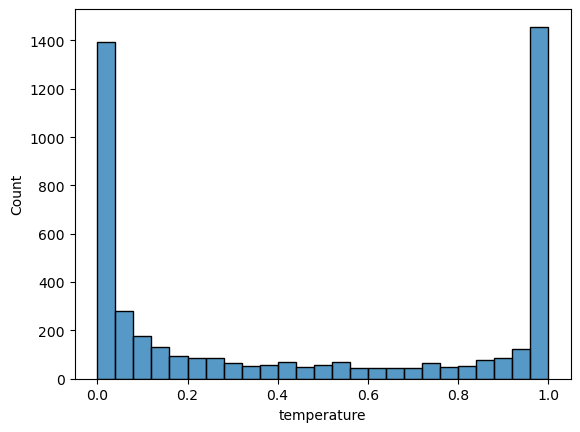

In [67]:
# Correlation between entropies and temperatures

input_scores = torch.cat(tp_details['input_scores'], dim=0)
input_scores = torch.nn.functional.softmax(input_scores, dim=1)

temps = torch.cat(tp_details['temps'], dim=0)

# Compute entropy
entropies = -torch.sum(input_scores * torch.log(input_scores), axis=1) / np.log(temps.shape[0])

sns.histplot(data=temps_df, x="temperature", bins=25)

In [62]:
temps_df = pd.DataFrame()
temps_df['temperature'] = temps.flatten()